<a href="https://colab.research.google.com/github/Adiboy77/YCSA/blob/main/YCSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")

In [7]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [8]:
ls

drive/  sample_data/


In [13]:
import os
os.chdir("/content/drive/MyDrive/")

In [14]:
data = pd.read_csv("uthoobComm - Sheet4.csv")

In [15]:
data.head()

,Name,Comment,Time,Likes,Reply Count
0,Daljit Babbu,🙏🙏🙏🙏🙏,2022-07-03T20:23:31Z,1,0
1,Rupinder Singh,No words for this beautiful qwali,2022-07-03T17:31:08Z,1,0
2,Kiran Mahajan,Best qawali ever👍👍♥️♥️,2022-07-03T14:34:25Z,1,0
3,Grace,🌹🙏 महान कलाकार रूहों का कमाल का संगम <br>परम प...,2022-07-03T13:24:50Z,1,0
4,Apne desi vlogs,Peachfull lyrics 😌,2022-07-03T13:06:21Z,0,0


In [16]:
data.shape

(989, 5)

In [17]:
data['polarity'] = data['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
data.head

<bound method NDFrame.head of                 Name                                            Comment  \
0       Daljit Babbu                                              🙏🙏🙏🙏🙏   
1     Rupinder Singh                  No words for this beautiful qwali   
2      Kiran Mahajan                             Best qawali ever👍👍♥️♥️   
3              Grace  🌹🙏 महान कलाकार रूहों का कमाल का संगम <br>परम प...   
4    Apne desi vlogs                                 Peachfull lyrics 😌   
..               ...                                                ...   
984      Jassi kumar                                         ♥️♥️♥️♥️♥️   
985   Gaurav Konshal                              ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️🙏   
986   Tanveer Haider                                               Good   
987  Mr Mahla Pb04 👈             Very very very very very nice 👍🙂👌👌👌👌👌👌   
988             abid                                               Nice   

                     Time  Likes  Reply Count  polarity  
0    2022-0

# Shuffling the dataset


In [19]:
data = data.sample(frac=1).reset_index(drop=True)

In [20]:
data['pol_cat']  = 0

Continuous to categorical

In [21]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [22]:
data.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,khan army,Nice,2022-01-25T01:45:56Z,0,0,0.6,1
1,SARIF KHAN,Who is listen in this month,2022-06-15T11:45:50Z,1,0,0.0,-1
2,Vg Yh,🙏🙏💝💝💝,2022-04-01T03:34:17Z,0,0,0.0,-1
3,mango mango,Reality of life.,2022-04-27T15:53:46Z,0,0,0.0,-1
4,BRAR JASS,❤️❤️❤️,2022-03-26T14:16:21Z,0,0,0.0,-1


In [23]:
data['pol_cat'].value_counts()

-1    699
 1    290
Name: pol_cat, dtype: int64

Creating separate dataframes for Negative,Positive & Neutral comments

In [24]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [25]:
data_pos.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,khan army,Nice,2022-01-25T01:45:56Z,0,0,0.6,1
1,Jassi Singh Mushe ala,I love this quali,2022-05-03T03:43:52Z,2,0,0.5,1
2,It's ADi,Xtra Ordinary Selection Of Each Word Full Of D...,2022-02-25T19:33:37Z,0,0,0.2,1
3,Msiddiq Siddiq,Love you ustad g,2021-10-20T22:28:38Z,17,0,0.5,1
4,T S,Straight touches to the heart. Mind blowing Qa...,2022-06-21T00:32:52Z,2,0,0.2,1


In [26]:
data_pos.shape

(290, 7)

In [27]:
data_neg.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,SARIF KHAN,Who is listen in this month,2022-06-15T11:45:50Z,1,0,0.0,-1
1,Vg Yh,🙏🙏💝💝💝,2022-04-01T03:34:17Z,0,0,0.0,-1
2,mango mango,Reality of life.,2022-04-27T15:53:46Z,0,0,0.0,-1
3,BRAR JASS,❤️❤️❤️,2022-03-26T14:16:21Z,0,0,0.0,-1
4,Shubham Dhiman,"Padi namaaz te riyaaz na sikhya, teri kis kaam...",2021-11-10T15:31:04Z,524,31,0.0,-1


In [29]:
data_neg['Comment'][40]

'Galbatt'

-1    699
 1    290
Name: pol_cat, dtype: int64

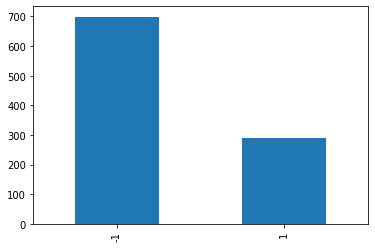

In [30]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

# Data Preprocessing

Lower casing the text in comments

In [31]:
data['Comment'] = data['Comment'].str.lower()

In [32]:
data['Comment'].head()

0                           nice
1    who is listen in this month
2                          🙏🙏💝💝💝
3               reality of life.
4                         ❤️❤️❤️
Name: Comment, dtype: object

In [33]:
data.describe()

,Likes,Reply Count,polarity,pol_cat
count,989.000000,989.000000,989.000000,989.000000
mean,8.356926,0.433771,0.158932,-0.413549
std,90.213708,5.052849,0.295305,0.910942
min,0.000000,0.000000,-0.800000,-1.000000
25%,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,0.000000,-1.000000
75%,4.000000,0.000000,0.250000,1.000000
max,2766.000000,152.000000,1.000000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         989 non-null    object 
 1   Comment      989 non-null    object 
 2   Time         989 non-null    object 
 3   Likes        989 non-null    int64  
 4   Reply Count  989 non-null    int64  
 5   polarity     989 non-null    float64
 6   pol_cat      989 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.2+ KB


In [42]:
data['Comment'][0]
#try out with a more english specific youtube video so there are no language issues in comments

'nice'

In [36]:
data['Comment'][0].strip()

'nice'

In [43]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [46]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
stop_words = set(stopwords.words('english'))

In [48]:
data['Comment'] = data['Comment'].str.strip()

In [49]:
train = data.copy()

In [50]:
train['Comment'] = train['Comment'].str.strip()

In [52]:
train['Comment'][0]

'nice'

In [53]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [54]:
data['stop_comments'] = data['Comment'].apply(lambda x : remove_stopwords(x))

In [55]:
data.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat,stop_comments
0,khan army,nice,2022-01-25T01:45:56Z,0,0,0.6,1,nice
1,SARIF KHAN,who is listen in this month,2022-06-15T11:45:50Z,1,0,0.0,-1,listen month
2,Vg Yh,🙏🙏💝💝💝,2022-04-01T03:34:17Z,0,0,0.0,-1,🙏🙏💝💝💝
3,mango mango,reality of life.,2022-04-27T15:53:46Z,0,0,0.0,-1,reality life .
4,BRAR JASS,❤️❤️❤️,2022-03-26T14:16:21Z,0,0,0.0,-1,❤️❤️❤️


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [58]:
X_train.shape

(791,)

In [59]:
X_test.shape

(198,)

In [60]:
data['pol_cat'].value_counts()

-1    699
 1    290
Name: pol_cat, dtype: int64

# Applying Logistic Regression

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [63]:
tf_train.shape

(791, 1791)

# Printing the Vocabulary

In [64]:
print(vect.vocabulary_)

{'ਕਮ': 1770, 'ਇਕ': 1762, 'legend': 826, 'ਸਰਤ': 1788, 'ਫਤ': 1782, 'ਅਲ': 1758, 'let': 830, 'add': 71, 'one': 1044, 'line': 837, 'kalaam': 713, 'miyan': 946, 'mohammad': 950, 'bakshh': 174, 'br': 264, 'quot': 1161, 'ikk': 617, 'gunaah': 546, 'mere': 929, 'maa': 870, 'pe': 1086, 'vekhn': 1514, 'devann': 375, 'des': 374, 'nikaala': 1017, 'lakhh': 815, 'gunah': 547, 'mera': 928, 'allah': 92, 'vekhe': 1513, 'parde': 1078, 'pawann': 1084, 'waala': 1525, 'love': 860, 'qawalli': 1152, 'lovs': 862, 'jesus': 668, 'please': 1111, 'parents': 1079, 'treasure': 1453, 'dil': 386, 'barae': 191, 'farokht': 460, 'ek': 423, 'meetha': 916, 'bhol': 228, 'reality': 1189, 'life': 833, 'wooww': 1549, 'kawali': 733, 'amazing': 97, 'nice': 1014, 'ultra': 1475, 'pro': 1128, 'sachai': 1245, 'aa': 43, 'waheguru': 1527, 'ya': 1564, 'hmen': 592, 'apni': 120, 'bas': 193, 'makhluq': 883, 'ki': 759, 'khidmat': 748, 'krny': 794, 'toufeeq': 1451, 'atta': 127, 'frmaye': 490, 'ameem': 98, 'sari': 1287, 'dunya': 409, 'tha': 1

In [65]:
vocab = vect.vocabulary_

In [66]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

Importing the logistic regression classifer and fitting on the training dataset

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

# Accuracy score on training dataset

In [68]:
lr.score(tf_train,y_train)

0.9608091024020228

# Accuracy score on test dataset i.e got from the splitting

In [69]:
lr.score(tf_test,y_test)

0.8939393939393939

# Make predictions on the test dataset i.e. unseen data to the model

In [70]:
expected = y_test
predicted = lr.predict(tf_test)

Plot confusion matrix for the test dataset

In [71]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [72]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[ 38  19]
 [  2 139]]


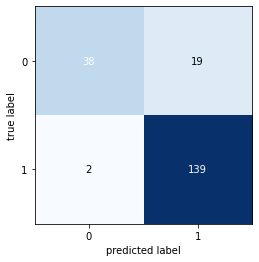

In [73]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [74]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.88      0.99      0.93       141
           1       0.95      0.67      0.78        57

    accuracy                           0.89       198
   macro avg       0.91      0.83      0.86       198
weighted avg       0.90      0.89      0.89       198



Finding the F1 score

In [75]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8566355204634004